<a href="https://colab.research.google.com/github/dmod99/COVID19_Predict/blob/main/data_6_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imorting all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
import statistics


# New Section

In [ ]:
#read and shuffle data
df = pd.read_csv("/content/Dataset-6.csv")
df = df.sample(frac = 1,random_state=2)

In [ ]:
df.columns

In [ ]:
df

In [ ]:
df['SARS-CoV-2'].value_counts()

In [ ]:
df.shape

In [ ]:
#dropping id column as it is not a valid attribute to train model
#df = df.drop(['Unnamed: 0'], axis = 1)
#df = df.drop(['New_ID'], axis = 1)

In [ ]:
df

In [ ]:
df.isnull().any()

In [ ]:
#df = df.fillna(lambda x: x.median())

In [ ]:
data = df.to_numpy()

data.shape

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(data)
#X_2 = X
SimpleImputer()
data = imp.transform(data)

data

In [ ]:
#splitting into 7 folds
data_g = np.array_split(data, 7)

## **LOGISTIC REGRESSION**

In [ ]:
accuracy_log_test = []
accuracy_log_train = []
classif_log_test=[]
classif_log_train=[]

for i in range(7):
  if i == 1:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:20])
                train_data_y.append(data_g[j][w][20])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:20])
                test_data_y.append(data_g[j][w][20])

    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
   
    #importing model from sklearn 
    clf = LogisticRegression(random_state = 0)
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    arr_2d = np.reshape(test_data_yn, (1022, 1))
    new_np = np.hstack((test_data_xn,arr_2d))
    finaltocsv= np.hstack((new_np,pred_prob1))
    finaldf = pd.DataFrame(finaltocsv)
    finaldf.to_csv("Dataset6-logistic-regression-test-results.csv")

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr1, tpr1, thresh1 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    #calculating and appending accuracies
    acc1_log = accuracy_score(test_data_yn, test_pred_y_log)
    accuracy_log_test.append(acc1_log)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))
    print("------------------TRAINING-----------------")
    acc2_log = accuracy_score(train_data_yn, train_pred_y_log)
    accuracy_log_train.append(acc2_log)
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(train_data_yn, train_pred_y_log, target_names=target_names))


In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(test_data_yn, test_pred_y_log)
cm

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_log_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_log_train))


# **NAIVE BAYES**

In [ ]:
accuracy_nb_test = []
accuracy_nb_train = []

for i in range(7):
  if i == 1:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:20])
                train_data_y.append(data_g[j][w][20])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:20])
                test_data_y.append(data_g[j][w][20])
       
    #convert into array         
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = GaussianNB()
    clf.fit(train_data_xn, train_data_yn)

    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    arr_2d = np.reshape(test_data_yn, (1022, 1))
    new_np = np.hstack((test_data_xn,arr_2d))
    finaltocsv= np.hstack((new_np,pred_prob1))
    finaldf = pd.DataFrame(finaltocsv)

    finaldf.to_csv("Dataset6-naive-bayes-test-results.csv")
    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr2, tpr2, thresh2 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_nb = clf.predict(test_data_xn)
    train_pred_y_nb = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_nb = accuracy_score(test_data_yn, test_pred_y_nb)
    accuracy_nb_test.append(acc1_nb)
    
    acc2_nb = accuracy_score(train_data_yn, train_pred_y_nb)
    accuracy_nb_train.append(acc2_nb)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_nb_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_nb_train))

# ***Fisher Linear Discriminant***

In [ ]:
accuracy_fl_test = []
accuracy_fl_train = []

for i in range(7):
  if i == 1:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:20])
                train_data_y.append(data_g[j][w][20])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:20])
                test_data_y.append(data_g[j][w][20])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = LinearDiscriminantAnalysis()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    arr_2d = np.reshape(test_data_yn, (1022, 1))
    new_np = np.hstack((test_data_xn,arr_2d))
    finaltocsv= np.hstack((new_np,pred_prob1))
    finaldf = pd.DataFrame(finaltocsv)
    finaldf.to_csv("Dataset6-fisher's-linear-discriminant-results.csv")

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr3, tpr3, thresh3 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_fl = clf.predict(test_data_xn)
    train_pred_y_fl = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_fl = accuracy_score(test_data_yn, test_pred_y_fl)
    accuracy_fl_test.append(acc1_fl)
    
    acc2_fl = accuracy_score(train_data_yn, train_pred_y_fl)
    accuracy_fl_train.append(acc2_fl)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_fl_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_fl_train))

# **KNN**

In [ ]:
df

In [ ]:
y=df[['SARS-CoV-2']] 
y

In [ ]:
x=df.drop(['SARS-CoV-2'], axis = 1)
x

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(x)
#X_2 = X
SimpleImputer()
X = imp.transform(x)
X

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.1, random_state=0)

In [ ]:
#Fitting K-NN classifier to the training set
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)
#importing model from sklearn 
    
    #predict class
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve
arr_2d = np.reshape(y_test, (154, 1))
new_np = np.hstack((x_test,arr_2d))
finaltocsv= np.hstack((new_np,pred_prob1))
finaldf = pd.DataFrame(finaltocsv)
finaldf.to_csv("Dataset6-KNN-test-results.csv")
    # roc curve for models
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

    # matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='FIsher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 
y_pred

In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)

In [ ]:
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(scale_pos_weight = 0.9)
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

In [ ]:
cm= confusion_matrix(y_test, y_pred)
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)

In [ ]:
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve

    # roc curve for models
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')



# New Section

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)



In [ ]:
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred
cm= confusion_matrix(y_test, y_pred)
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve

    # roc curve for models
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='FIsher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')



plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
classifier.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 73.99%
The Confusion Matrix is:
  [[476  20]
 [166  53]]
                precision    recall  f1-score   support

Covid Negative       0.74      0.96      0.84       496
Covid Positive       0.73      0.24      0.36       219

      accuracy                           0.74       715
     macro avg       0.73      0.60      0.60       715
  weighted avg       0.74      0.74      0.69       715

0.7946034025629695


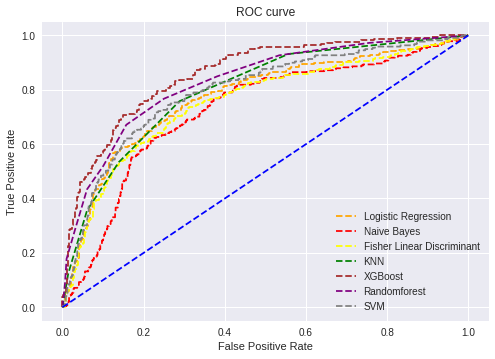

In [ ]:
eval_set = [(x_train, y_train), (x_test, y_test)]
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred
cm= confusion_matrix(y_test, y_pred)
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve

    # roc curve for models
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')
plt.plot(fpr7, tpr7, linestyle='--',color='grey', label='SVM')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
!pip3 install pandas_ml
!pip3 install scikit-learn==0.21
!pip3 install pandas==0.24.2

     |████████████████████████████████| 100 kB 6.9 MB/s 


     |████████████████████████████████| 6.7 MB 11.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


     |████████████████████████████████| 10.1 MB 13.9 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.24.2 which is incompatible.
plotnine 0.6.0 requires pandas>=0.25.0, but you have pandas 0.24.2 which is incompatible.
mizani 0.6.0 requires pandas>=0.25.0, but you have pandas 0.24.2 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 0.24.2 which is incompatible.
fbprophet 0.7.1 requires pandas>=1.0.4, but you have pandas 0.24.2 which is incompatible.


In [ ]:
from pandas_ml import ConfusionMatrix
dataset = pd.read_csv('/content/Dataset-6.csv')

total_neg_samples=sum(dataset['SARS-CoV-2']==0)
total_pos_samples=sum(dataset['SARS-CoV-2']==1)
scale_pos_weight = total_neg_samples / total_pos_samples

dataset.reset_index(inplace = True)

y = dataset[['SARS-CoV-2']]

X = dataset
X.drop(labels=None, axis=1, columns=['SARS-CoV-2','index'], level=None, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = XGBClassifier(use_label_encoder=False, scale_pos_weight = scale_pos_weight)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)

y_pred = model.predict(X_test)
test_probs = model.predict_proba(X_test)
test_probs = test_probs[:, 1]
auc = roc_auc_score(y_test, test_probs)
print('AUC Score is ', (auc), '\n')
from sklearn.metrics import roc_curve

    # roc curve for models
fpr8, tpr8, thresh8 = roc_curve(y_test, test_probs, pos_label=1)
pred = pd.DataFrame(y_pred, columns=['SARS-CoV-2'])
test = pd.DataFrame(y_test, columns=['SARS-CoV-2'])
test.reset_index(inplace = True)
test.drop(labels=None, axis=1, columns=['index'], level=None, inplace=True)

CM = ConfusionMatrix(test['SARS-CoV-2'], pred['SARS-CoV-2'])

print('CONFUSION MATRIX -\n',(CM), '\n')
CM.print_stats()
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(fpr8, tpr8, linestyle='--',color='brown', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='Randomforest')
plt.plot(fpr7, tpr7, linestyle='--',color='grey', label='SVM')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

ValueError: ignored